In [11]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import matplotlib.pyplot as plt

# Path to the dataset
DATASET_DIR = "/content/drive/MyDrive/PGP Datasets/Indian Letter Handwritten Recognition/DatasetIND"

IMG_SIZE = 28
images = []
labels = []

for label in os.listdir(DATASET_DIR):
    class_dir = os.path.join(DATASET_DIR, label)
    print(f"📁 Checking folder: {class_dir}")
    if os.path.isdir(class_dir):
        for file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, file)
            try:
                img = Image.open(img_path).convert('L')  # 'L' mode = grayscale
                img = img.resize((IMG_SIZE, IMG_SIZE))
                img_array = np.array(img)
                images.append(img_array)
                labels.append(label)
            except Exception as e:
                print(f"❌ Could not load image: {img_path} | Error: {e}")

# Convert to NumPy and normalize
X = np.array(images).astype("float32") / 255.0
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(labels)

print("✅ Loaded images:", X.shape)
print("✅ Labels:", y.shape)

# Encode class labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

print("✅ Train set:", X_train.shape, y_train.shape)
print("✅ Test set:", X_test.shape, y_test.shape)


📁 Checking folder: /content/drive/MyDrive/PGP Datasets/Indian Letter Handwritten Recognition/DatasetIND/ण (ṇa)
📁 Checking folder: /content/drive/MyDrive/PGP Datasets/Indian Letter Handwritten Recognition/DatasetIND/ए (e)
📁 Checking folder: /content/drive/MyDrive/PGP Datasets/Indian Letter Handwritten Recognition/DatasetIND/भ (bha)
📁 Checking folder: /content/drive/MyDrive/PGP Datasets/Indian Letter Handwritten Recognition/DatasetIND/ल (la)
📁 Checking folder: /content/drive/MyDrive/PGP Datasets/Indian Letter Handwritten Recognition/DatasetIND/स (sa)
📁 Checking folder: /content/drive/MyDrive/PGP Datasets/Indian Letter Handwritten Recognition/DatasetIND/ब (ba)
📁 Checking folder: /content/drive/MyDrive/PGP Datasets/Indian Letter Handwritten Recognition/DatasetIND/इ (i)
📁 Checking folder: /content/drive/MyDrive/PGP Datasets/Indian Letter Handwritten Recognition/DatasetIND/च (cha)
📁 Checking folder: /content/drive/MyDrive/PGP Datasets/Indian Letter Handwritten Recognition/DatasetIND/व (va)


PCA shape: (1339, 50)
t-SNE shape: (1339, 2)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2339 (\N{DEVANAGARI LETTER NNA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2319 (\N{DEVANAGARI LETTER E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/py

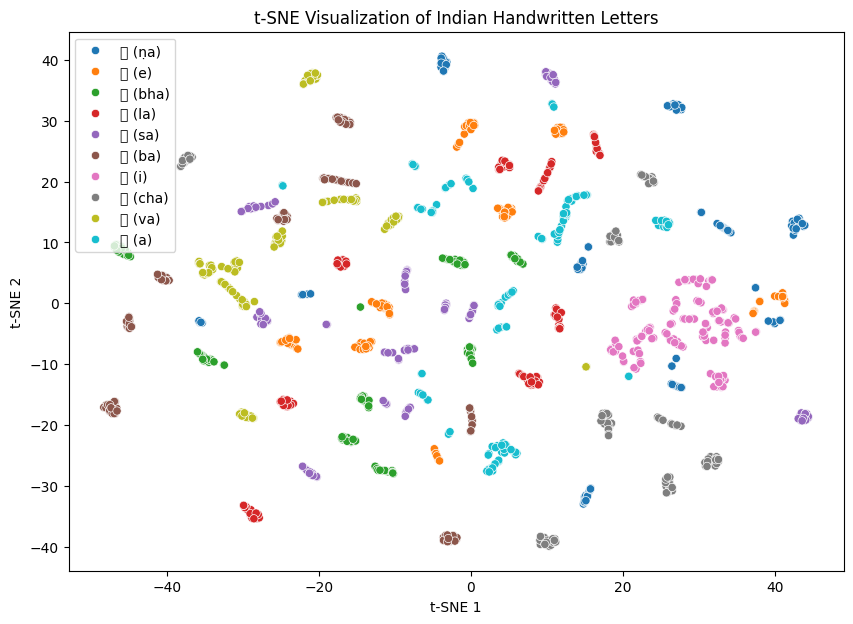

In [12]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Flatten the image data for PCA/t-SNE
X_flat = X.reshape(X.shape[0], -1)  # from (1339, 28, 28, 1) to (1339, 784)

# Reduce dimensions with PCA first
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_flat)

print("PCA shape:", X_pca.shape)

# Now apply t-SNE to PCA-reduced data
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_pca)

print("t-SNE shape:", X_tsne.shape)

# Plot the t-SNE output
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette="tab10", legend='full')
plt.title("t-SNE Visualization of Indian Handwritten Letters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


In [13]:
# Model 1: Train an SVM Classifier (on flattened image vectors)
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Flatten train/test data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train SVM
svm = SVC(kernel='rbf', C=10, gamma=0.01)
svm.fit(X_train_flat, y_train)

# Predict & Evaluate
y_pred_svm = svm.predict(X_test_flat)
print("🎯 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=encoder.classes_))


🎯 SVM Accuracy: 0.9514925373134329
              precision    recall  f1-score   support

       अ (a)       0.91      1.00      0.95        29
       इ (i)       0.93      0.93      0.93        29
       ए (e)       1.00      1.00      1.00        25
     च (cha)       1.00      1.00      1.00        26
     ण (ṇa)       1.00      0.92      0.96        25
      ब (ba)       1.00      1.00      1.00        26
     भ (bha)       0.95      0.76      0.84        25
      ल (la)       1.00      1.00      1.00        28
      व (va)       0.96      0.96      0.96        28
      स (sa)       0.81      0.93      0.86        27

    accuracy                           0.95       268
   macro avg       0.96      0.95      0.95       268
weighted avg       0.95      0.95      0.95       268



In [14]:
# Model 2: Train a Neural Network (CNN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# One-hot encode labels for neural net
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # 10 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.1182 - loss: 2.3073 - val_accuracy: 0.2047 - val_loss: 2.2719
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1912 - loss: 2.2484 - val_accuracy: 0.2977 - val_loss: 2.1583
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.2574 - loss: 2.1307 - val_accuracy: 0.3860 - val_loss: 1.8943
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3645 - loss: 1.8775 - val_accuracy: 0.4186 - val_loss: 1.6992
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4195 - loss: 1.6515 - val_accuracy: 0.5209 - val_loss: 1.4363
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5086 - loss: 1.4671 - val_accuracy: 0.5907 - val_loss: 1.2382
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5983 - loss: 1.2403 - val_accuracy: 0.6279 - val_loss: 1.1182
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.6347 - loss: 1.0665 - val_accuracy: 0.7070 - val_loss: 0.

In [15]:
# Evaluate Neural Network
loss, accuracy = model.evaluate(X_test, y_test_cat)
print("🎯 CNN Test Accuracy:", accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8371 - loss: 0.5841
🎯 CNN Test Accuracy: 0.8059701323509216


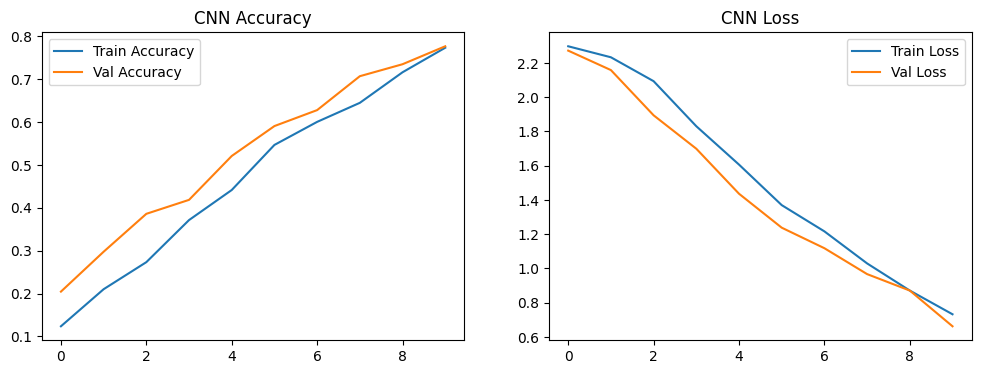

In [16]:
# Plot CNN Accuracy & loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("CNN Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("CNN Loss")
plt.legend()

plt.show()


In [17]:
# Hyperparameter Tuning (Model Tuning)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=3, verbose=2, n_jobs=-1)
grid.fit(X_train_flat, y_train)

print("✅ Best SVM Parameters:", grid.best_params_)
print("🎯 Best CV Accuracy:", grid.best_score_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
✅ Best SVM Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
🎯 Best CV Accuracy: 0.992530345471522


In [18]:
# Save the Best CNN Model (Optional)
model.save("best_cnn_model.h5")


In [19]:
# Final Evaluation Report
# Create a simple evaluation summary:
print("🔍 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("🔍 CNN Accuracy:", accuracy)


🔍 SVM Accuracy: 0.9514925373134329
🔍 CNN Accuracy: 0.8059701323509216
